In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [33]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [34]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [35]:
# View all of the classes that automap found
tables = Base.classes.keys()
tables

['measurement', 'station']

In [36]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [37]:
inspector = inspect(engine)
inspector.get_table_names()
print('measurement table columns:')
for column in inspector.get_columns('measurement'):
    print(column['name'], column['type'])
print('\nstation table columns:')
for column in inspector.get_columns('station'):
    print(column['name'], column['type'])

measurement table columns:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station table columns:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [38]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
latest_date_str = session.query(Measurement).order_by(Measurement.date.desc()).first().date
print(latest_date_str)
latest_date = dt.datetime.strptime(latest_date_str, '%Y-%m-%d')
one_year_ago_date = latest_date - dt.timedelta(days = 365)
one_year_ago_date

2017-08-23


datetime.datetime(2016, 8, 23, 0, 0)

In [40]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_date).all()
final = {row[0]:row[1] for row in results}
type(final), final

(dict,
 {'2016-08-24': 1.45,
  '2016-08-25': 0.11,
  '2016-08-26': 0.01,
  '2016-08-27': None,
  '2016-08-28': 2.07,
  '2016-08-29': 0.9,
  '2016-08-30': 0.05,
  '2016-08-31': 2.46,
  '2016-09-01': 0.01,
  '2016-09-02': 0.03,
  '2016-09-03': 1.0,
  '2016-09-04': 0.44,
  '2016-09-05': 0.18,
  '2016-09-06': 1.0,
  '2016-09-07': 1.35,
  '2016-09-08': 0.15,
  '2016-09-09': 0.35,
  '2016-09-10': 1.16,
  '2016-09-11': 0.6,
  '2016-09-12': 1.04,
  '2016-09-13': 1.2,
  '2016-09-14': 6.7,
  '2016-09-15': 3.35,
  '2016-09-16': 0.61,
  '2016-09-17': 0.23,
  '2016-09-18': 0.42,
  '2016-09-19': 0.25,
  '2016-09-20': 0.43,
  '2016-09-21': 1.02,
  '2016-09-22': 0.75,
  '2016-09-23': 0.33,
  '2016-09-24': 0.27,
  '2016-09-25': 0.04,
  '2016-09-26': 1.02,
  '2016-09-27': 1.0,
  '2016-09-28': 0.05,
  '2016-09-29': 1.49,
  '2016-09-30': 0.38,
  '2016-10-01': 1.02,
  '2016-10-02': 0.61,
  '2016-10-03': 0.46,
  '2016-10-04': 3.46,
  '2016-10-05': 0.81,
  '2016-10-06': 0.04,
  '2016-10-07': 0.01,
  '2016-10

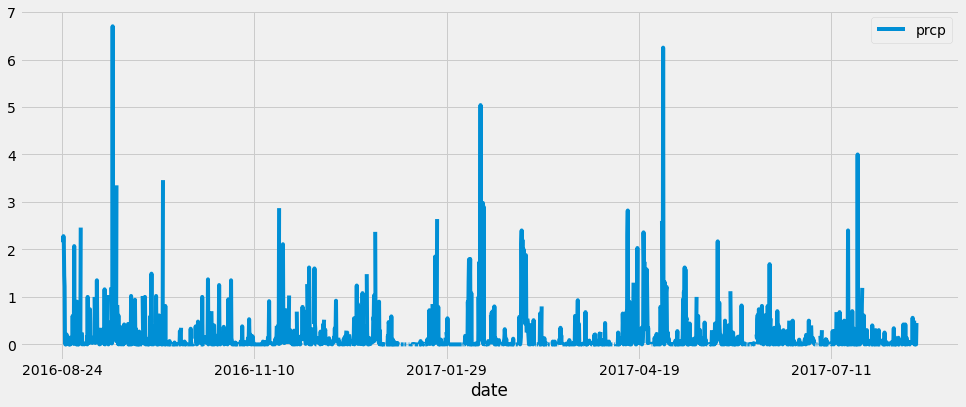

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date = dt.datetime.strptime(latest_date_str, '%Y-%m-%d')
one_year_ago_date = latest_date - dt.timedelta(days = 365)
one_year_ago_date

# Perform a query to retrieve the data and precipitation scores
stmt = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_date).statement

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.read_sql_query(stmt, conn)
measurement_df.set_index('date', inplace = True)
measurement_df

# Sort the dataframe by date
measurement_df.sort_index(inplace = True)
# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(figsize = (15, 6))
plt.show()


In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [44]:
stations = session.query(Station.station).all()
stations

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [45]:
stations = (session.query(Station.station).all())
stations

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [46]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count_ = func.count(Measurement.station)
session.query(Measurement.station, count_).group_by(Measurement.station).order_by(count_.desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_df = pd.read_sql_query(session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').statement, conn)
temp_df.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == 'USC00519281').all()

[(54.0, 71.66378066378067, 85.0)]

In [49]:
sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
result = session.query(*sel).filter(Measurement.station == 'USC00519281').all()
print(result)
list(np.ravel(result))

[(54.0, 71.66378066378067, 85.0)]


[54.0, 71.66378066378067, 85.0]

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
latest_date_str = session.query(Measurement).order_by(Measurement.date.desc()).first().date
print(latest_date_str)
latest_date = dt.datetime.strptime(latest_date_str,'%Y-%m-%d')
one_year_ago_date = latest_date - dt.timedelta(days = 365)
print(one_year_ago_date)
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= one_year_ago_date).all()
final = {row[0]:row[1] for row in results}



2017-08-23
2016-08-23 00:00:00


In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temp_obs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
temp_obs

[(77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (74.0,),


In [52]:
# create the dataframe
temp_df = pd.DataFrame(temp_obs, columns = ["tobs"])
temp_df.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


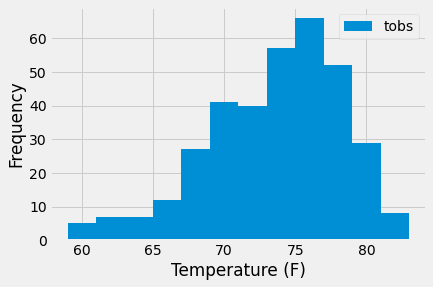

In [53]:
# create the plot

plt.hist(temp_df['tobs'], bins = 12)
plt.ylabel('Frequency')
plt.xlabel('Temperature (F)')
plt.legend(['tobs'])

plt.show()

# Close session

In [54]:
# Close Session
session.close()